# Задание №2 (Кодирование и декодирование информации)

---

Сложность: легкое

Время выполнения: 2 минуты

Автор: Гимазетдинов Дмитрий

ТГ: [@devwhoami](https://t.me/s/devwhoami)

GitHub: [C4be](https://github.com/C4be)

---

## 1. Необходимый теоретический минимум

### 1.1. Кодирование и декодирование информации

> Кодирование — это перевод информации с одного языка на другой. Обычно это значит:
"Перевод данных в другой алфавит или другую систему символов".

**Пример:**
Мы можем записать слово «КОТ» в двоичном коде, в азбуке Морзе, в виде чисел, или даже с помощью смайликов 🐱.

### 1.2. Формальные языки и компьютеры

Чаще всего под **кодированием** понимают перевод **человеческой (естественной)** информации в **формальный (машинный)** вид, например:

- Текст → в двоичный код
- Числа → в байтовое представление
- Картинки → в набор пикселей

Обратный процесс называется **декодированием**.

### 1.3. Виды кодирования

#### По количеству символов

Один символ может быть заменён:

- одним символом в коде (например, А → 1)
- несколькими символами (А → 101)
- несколько символов → один код (например, «это» → ¥)

**Пример:**
Китайский иероглиф может обозначать целое слово, а не одну букву. Это тоже вариант кодирования.

#### По длине кодов (равномерность)

Равномерное кодирование – все символы кодируются кодами одной длины.

➕ легко расшифровывать.

➖ может быть неэкономично.

Неравномерное кодирование – коды могут быть разной длины.

➕ Часто позволяет сократить общий размер сообщения.

➖ Декодировать сложнее, возможны неоднозначности.

### 1.4. Однозначное декодирование

Чтобы закодированное сообщение можно было однозначно расшифровать, существуют специальные условия.

**Условие Фано (прямое)**

> Ни одно кодовое слово не должно начинаться с другого кодового слова.

Это значит, что при чтении сообщения с начала, мы точно знаем, где заканчивается один символ и начинается следующий.

**Пример (выполняется):**

Коды:

- А → 0
- Б → 10
- В → 11

→ Всё однозначно. Ни одно слово не начинается с другого.

Пример (НЕ выполняется):

- А → 0
- Б → 01

→ Здесь «0» может быть А, но это же начало кода Б → неоднозначность!

**Обратное условие Фано**

> Ни одно кодовое слово не должно заканчиваться другим кодовым словом.

Это нужно, если мы хотим читать сообщение с конца, например, при обратной декодировке.

## 2. Разновидности заданий на ЕГЭ

### 2.1. Выбор кода при неиспользуемых сигналах

**Пример №1**

По каналу связи передаются сообщения, содержащие только семь букв: А, Б, Г, И, М, Р, Я. Для передачи используется двоичный код, удовлетворяющий условию Фано. Кодовые слова для некоторых букв известны: А  — 010, Б  — 011, Г  — 100. Какое наименьшее количество двоичных знаков потребуется для кодирования слова МАГИЯ?
 
Примечание. Условие Фано означает, что ни одно кодовое слово не является началом другого кодового слова.

**Решение:**

Чтобы решать такие задания, необходимо построить дерево по правилу, что слева мы к двоичному коду добавляем 0, а справа мы добавляем 1. Это позволит соблюдать условие Фано.

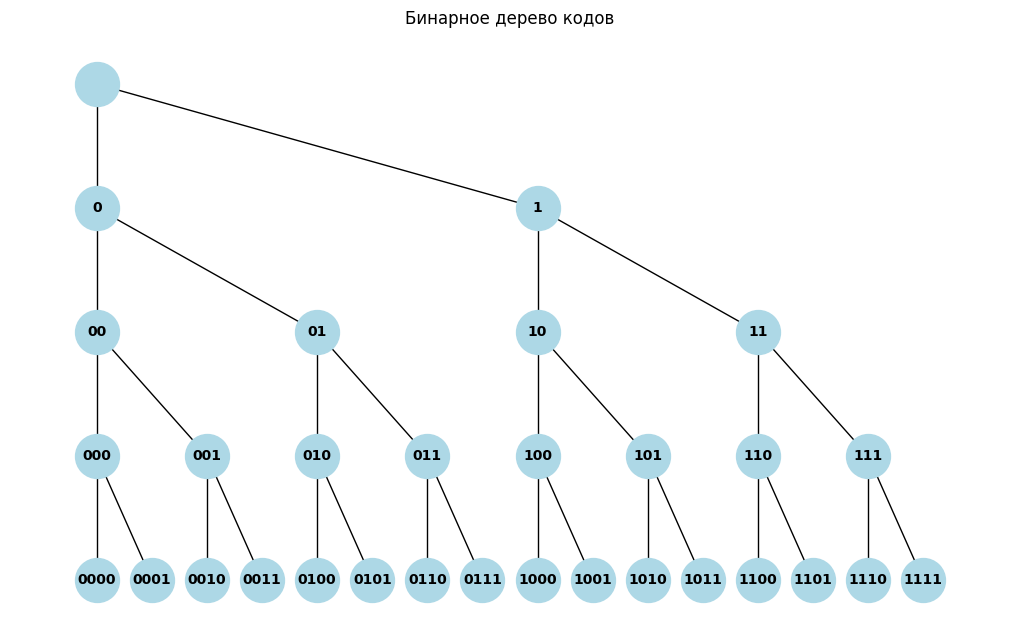

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def build_binary_tree_graph(max_depth):
    G = nx.DiGraph()

    def dfs(node, depth):
        if depth > max_depth:
            return
        if node != "":
            G.add_node(node)
        if depth < max_depth:
            left = node + '0'
            right = node + '1'
            G.add_edge(node, left)
            G.add_edge(node, right)
            dfs(left, depth + 1)
            dfs(right, depth + 1)

    G.add_node("")  # корень
    dfs("", 0)
    return G

def draw_tree(G):
    pos = hierarchy_pos(G, "")  # Позиции для иерархического дерева
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, arrows=False, node_size=1000,
            node_color="lightblue", font_size=10, font_weight="bold")
    plt.title("Бинарное дерево кодов")
    plt.show()

# Вспомогательная функция для размещения узлов иерархически
def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / 2
        nextx = xcenter - width / 2
        for child in children:
            nextx += dx
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos, parent=root)
    return pos

# Строим и рисуем дерево глубиной 3
G = build_binary_tree_graph(4)
draw_tree(G)


Далее нам необходимо с ним поработать, а именно, зафиксировать те вершины, которые уже имеются: А  — 010, Б  — 011, Г  — 100. От них мы не сможем наследоваться:

![step1](./../../materials/ege_4/bin_tree_1.png)

Нам остается закодировать 4 буквы: ИМРЯ, причем в слове МАГИЯ встречается только 3 из них (ИМЯ), тогда придерживаемся стратегии, что для Р подбираем самый большой код, а для других букв, самый короткий:

![step2](./../../materials/ege_4/bin_tree_2.png)

Тогда длинна итоговой строки будет: $2 + 3 + 3 + 2 + 4 = 14$

### 2.2. Передача информации. Выбор кода

